In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [52]:
np.random.seed(0)
iris = load_iris()

In [53]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = pd.Categorical.from_codes(codes=iris.target, categories=iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
X = iris_df.iloc[:, :-1]
y = iris_df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
random_forest = RandomForestClassifier(n_jobs=2, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [56]:
predictions = random_forest.predict(X_test)
predictions

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [57]:
random_forest.predict_proba(X_test)

array([[0.  , 0.01, 0.99],
       [0.  , 0.94, 0.06],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.92, 0.08],
       [0.  , 1.  , 0.  ],
       [0.  , 0.24, 0.76],
       [0.  , 0.99, 0.01],
       [0.  , 0.99, 0.01],
       [0.  , 0.94, 0.06],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 0.97, 0.03],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.27, 0.73],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.22, 0.78],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.05, 0.8 , 0.15],
       [1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.97, 0.03],
       [1.  , 0.  , 0.  ],
 

Text(0.5, 15.0, 'Predicted species')

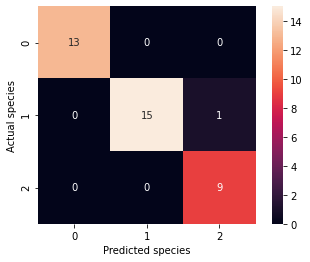

In [58]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(confusion_matrix, annot=True, square=True)
plt.ylabel("Actual species")
plt.xlabel("Predicted species")

In [59]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9736842105263158